Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('preprocessed_combined_dataset.csv')

In [3]:
df.head()

,site,role,company_name,location,job_description,min_salary,max_salary,ratings,job_level,Search_Keywords,Search_Location,Job_Detail_Link,Post_Time,Current_Time,job_type
0,glassdoor,data analyst data entry,juristat,remote,juristat building innovative suite products ne...,30000.0,35000.0,NaN,entry_level,NaN,NaN,NaN,NaN,NaN,NaN
1,glassdoor,business systems analyst,distributed solar development,new york ny,join azad technology partners business systems...,130000.0,160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,glassdoor,data analyst,haberfeld,lincoln ne,haberfeld align marketing products people sust...,54000.0,82000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,glassdoor,data analysis charlotte corporate location,genpak llc,charlotte nc,data analyst collect customer requirements det...,52000.0,81000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,glassdoor,data science graduate,hewlett packard enterprise,spring tx,data science graduate role designated edge mea...,57000.0,131000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(25923, 15)

In [5]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25923 entries, 0 to 25922
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   site             25923 non-null  object 
 1   role             25923 non-null  object 
 2   company_name     25768 non-null  object 
 3   location         25617 non-null  object 
 4   job_description  23537 non-null  object 
 5   min_salary       9174 non-null   float64
 6   max_salary       9174 non-null   float64
 7   ratings          3959 non-null   float64
 8   job_level        3917 non-null   object 
 9   Search_Keywords  1208 non-null   object 
 10  Search_Location  1208 non-null   object 
 11  Job_Detail_Link  1208 non-null   object 
 12  Post_Time        1208 non-null   object 
 13  Current_Time     1208 non-null   object 
 14  job_type         630 non-null    object 
dtypes: float64(3), object(12)
memory usage: 3.0+ MB


In [7]:
"""Missing values"""
df.isnull().sum()

site                   0
role                   0
company_name         155
location             306
job_description     2386
min_salary         16749
max_salary         16749
ratings            21964
job_level          22006
Search_Keywords    24715
Search_Location    24715
Job_Detail_Link    24715
Post_Time          24715
Current_Time       24715
job_type           25293
dtype: int64

In [8]:
df.drop(['ratings','Search_Keywords','Search_Location','Job_Detail_Link','job_type','site'],axis=1,inplace=True)

In [9]:
columns_to_impute = ['role', 'company_name', 'location', 'job_description', 'job_level']

for column in columns_to_impute:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
    missing_count = df[column].isnull().sum()
    print(f"Number of missing values in {column}: {missing_count}")

Number of missing values in role: 0
Number of missing values in company_name: 0
Number of missing values in location: 0
Number of missing values in job_description: 0
Number of missing values in job_level: 0


In [10]:
df['Post_Time'].fillna(method='bfill', inplace=True)
df['Post_Time'].fillna(method='ffill', inplace=True)

In [11]:
df['Current_Time'].fillna(method='bfill', inplace=True)
df['Current_Time'].fillna(method='ffill', inplace=True)

In [12]:
# Impute numerical columns with median
numeric_columns = ['min_salary', 'max_salary']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Impute text data with a placeholder
df['job_description'] = df['job_description'].fillna('Not available')


In [13]:
df.isnull().sum()

role               0
company_name       0
location           0
job_description    0
min_salary         0
max_salary         0
job_level          0
Post_Time          0
Current_Time       0
dtype: int64

In [14]:
df.tail()

,role,company_name,location,job_description,min_salary,max_salary,job_level,Post_Time,Current_Time
25918,staff software engineer,linktree,los angeles ca,role looking staff software engineers great pr...,137000.0,187000.0,entry_level,employer active 5 days ago •many applications ...,2023-11-14
25919,jr software engineer,life cycle engineering,charleston sc,jr software engineer position summary lce supp...,95000.0,150000.0,entry_level,employer active 5 days ago •many applications ...,2023-11-14
25920,full stack software engineer remote eligible,sentrilock llc,ohio,description sentrilock sentrilock global provi...,64000.0,89000.0,entry_level,employer active 5 days ago •many applications ...,2023-11-14
25921,software engineer remote,best corp,remote,love developing software innovating looking gr...,64000.0,89000.0,entry_level,employer active 5 days ago •many applications ...,2023-11-14
25922,application developer hybrid,vanderbilt university,nashville tn,application developer part enterprise applicat...,72000.0,94000.0,entry_level,employer active 5 days ago •many applications ...,2023-11-14


Text Cleaning

In [15]:
from nltk.tokenize import word_tokenize
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords

In [19]:
from nltk.stem.porter import PorterStemmer

In [20]:
ps=PorterStemmer()

In [21]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from bs4 import BeautifulSoup

In [23]:
def transform_text(text):

  # Convert to lowercase
  text = text.lower()

  # Remove HTML tags
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()

  # Tokenize the text
  text = nltk.word_tokenize(text)

  # Remove non-alphanumeric characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  #cloning
  text = y[:]
  y.clear()


  # Remove stopwords and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # cloning
  text  = y[:]
  y.clear()


  # Stem the words
  for i in text:
    y.append(ps.stem(i))


  # Join the processed words into a string
  return " ".join(y)

In [24]:
df['transformed_text'] = df['job_description'].apply(transform_text)

In [25]:
df.head()

,role,company_name,location,job_description,min_salary,max_salary,job_level,Post_Time,Current_Time,transformed_text
0,data analyst data entry,juristat,remote,juristat building innovative suite products ne...,30000.0,35000.0,entry_level,employer active 4 days ago,2023-11-14,juristat build innov suit product need team cr...
1,business systems analyst,distributed solar development,new york ny,join azad technology partners business systems...,130000.0,160000.0,entry_level,employer active 4 days ago,2023-11-14,join azad technolog partner busi system analys...
2,data analyst,haberfeld,lincoln ne,haberfeld align marketing products people sust...,54000.0,82000.0,entry_level,employer active 4 days ago,2023-11-14,haberfeld align market product peopl sustain s...
3,data analysis charlotte corporate location,genpak llc,charlotte nc,data analyst collect customer requirements det...,52000.0,81000.0,entry_level,employer active 4 days ago,2023-11-14,data analyst collect custom requir determin te...
4,data science graduate,hewlett packard enterprise,spring tx,data science graduate role designated edge mea...,57000.0,131000.0,entry_level,employer active 4 days ago,2023-11-14,data scienc graduat role design edg mean prima...


In [26]:
from nltk.corpus import opinion_lexicon

In [27]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [28]:
# Load positive and negative words from opinion_lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [29]:
def analyze_sentiment(text):
    words = word_tokenize(text.lower())
    sentiment_score = sum([1 if word in positive_words else -1 if word in negative_words else 0 for word in words])
    return "positive" if sentiment_score > 0 else "negative" if sentiment_score < 0 else "neutral"

In [30]:
df['sentiment'] = df['transformed_text'].apply(analyze_sentiment)

In [31]:
df['sentiment'].value_counts()

positive    23951
neutral      1379
negative      593
Name: sentiment, dtype: int64

In [32]:
df.head()

,role,company_name,location,job_description,min_salary,max_salary,job_level,Post_Time,Current_Time,transformed_text,sentiment
0,data analyst data entry,juristat,remote,juristat building innovative suite products ne...,30000.0,35000.0,entry_level,employer active 4 days ago,2023-11-14,juristat build innov suit product need team cr...,positive
1,business systems analyst,distributed solar development,new york ny,join azad technology partners business systems...,130000.0,160000.0,entry_level,employer active 4 days ago,2023-11-14,join azad technolog partner busi system analys...,positive
2,data analyst,haberfeld,lincoln ne,haberfeld align marketing products people sust...,54000.0,82000.0,entry_level,employer active 4 days ago,2023-11-14,haberfeld align market product peopl sustain s...,positive
3,data analysis charlotte corporate location,genpak llc,charlotte nc,data analyst collect customer requirements det...,52000.0,81000.0,entry_level,employer active 4 days ago,2023-11-14,data analyst collect custom requir determin te...,neutral
4,data science graduate,hewlett packard enterprise,spring tx,data science graduate role designated edge mea...,57000.0,131000.0,entry_level,employer active 4 days ago,2023-11-14,data scienc graduat role design edg mean prima...,positive


EDA

In [33]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


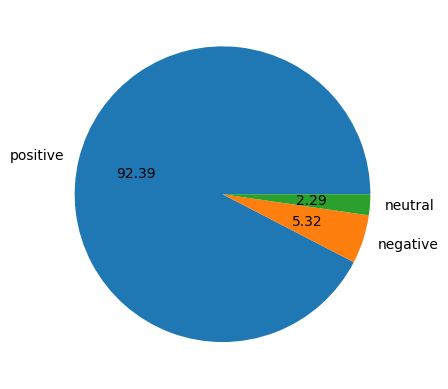

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels=['positive','negative','neutral'],autopct='%0.2f')
plt.show()

In [35]:
"""Extracting Text Featurs"""

text_df = df[["transformed_text"]]

text_df.head()

,transformed_text
0,juristat build innov suit product need team cr...
1,join azad technolog partner busi system analys...
2,haberfeld align market product peopl sustain s...
3,data analyst collect custom requir determin te...
4,data scienc graduat role design edg mean prima...


In [36]:
"""Catagorical Feature"""

cat_df = df[['role','company_name','location','job_level','sentiment']]

cat_df.head()

,role,company_name,location,job_level,sentiment
0,data analyst data entry,juristat,remote,entry_level,positive
1,business systems analyst,distributed solar development,new york ny,entry_level,positive
2,data analyst,haberfeld,lincoln ne,entry_level,positive
3,data analysis charlotte corporate location,genpak llc,charlotte nc,entry_level,neutral
4,data science graduate,hewlett packard enterprise,spring tx,entry_level,positive


<AxesSubplot:>

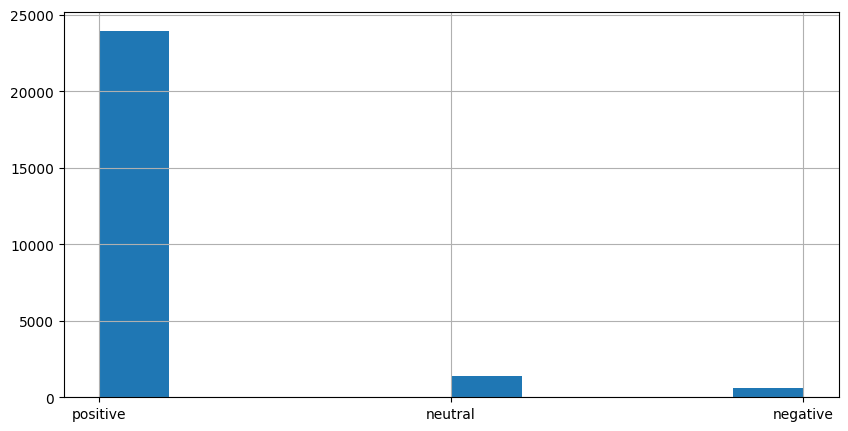

In [37]:
df['sentiment'].hist(figsize=(10,5))

In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import seaborn as sns

In [40]:
# label encoding the sentiment
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [46]:
df.head()

,role,company_name,location,job_description,min_salary,max_salary,job_level,Post_Time,Current_Time,transformed_text,sentiment
0,data analyst data entry,juristat,remote,juristat building innovative suite products ne...,30000.0,35000.0,entry_level,employer active 4 days ago,2023-11-14,juristat build innov suit product need team cr...,2
1,business systems analyst,distributed solar development,new york ny,join azad technology partners business systems...,130000.0,160000.0,entry_level,employer active 4 days ago,2023-11-14,join azad technolog partner busi system analys...,2
2,data analyst,haberfeld,lincoln ne,haberfeld align marketing products people sust...,54000.0,82000.0,entry_level,employer active 4 days ago,2023-11-14,haberfeld align market product peopl sustain s...,2
3,data analysis charlotte corporate location,genpak llc,charlotte nc,data analyst collect customer requirements det...,52000.0,81000.0,entry_level,employer active 4 days ago,2023-11-14,data analyst collect custom requir determin te...,1
4,data science graduate,hewlett packard enterprise,spring tx,data science graduate role designated edge mea...,57000.0,131000.0,entry_level,employer active 4 days ago,2023-11-14,data scienc graduat role design edg mean prima...,2


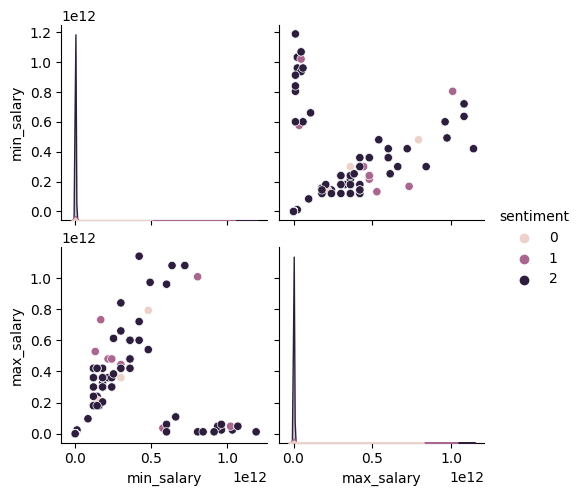

In [42]:
sns.pairplot(df,hue='sentiment')

<AxesSubplot:>

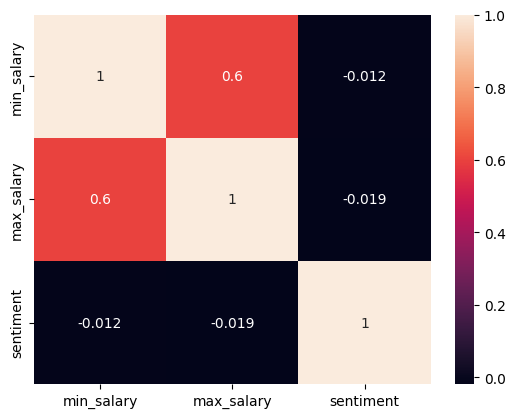

In [43]:
sns.heatmap(df.corr(),annot=True)

Number of characters in text

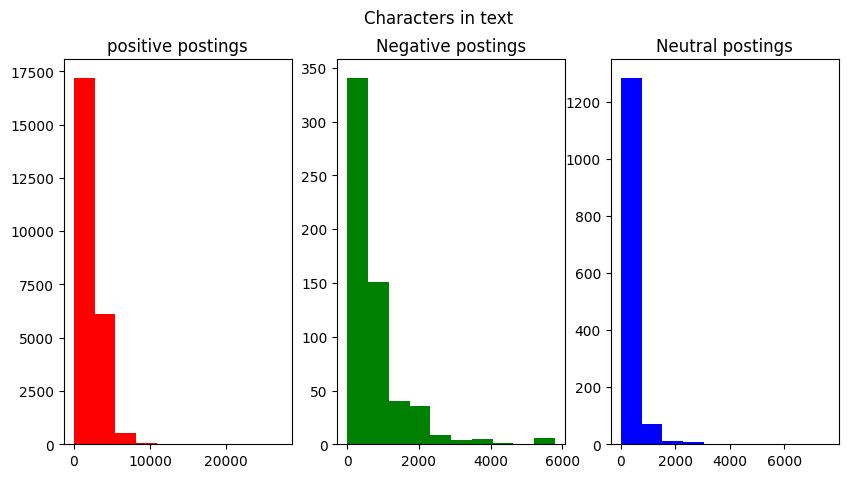

In [44]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
text_len=df[df['sentiment']==2]['transformed_text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('positive postings')
text_len=df[df['sentiment']==0]['transformed_text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Negative postings')
text_len=df[df['sentiment']==1]['transformed_text'].str.len()
ax3.hist(text_len,color='blue')
ax3.set_title('Neutral postings')
fig.suptitle('Characters in text')
plt.show()

Number of words in text

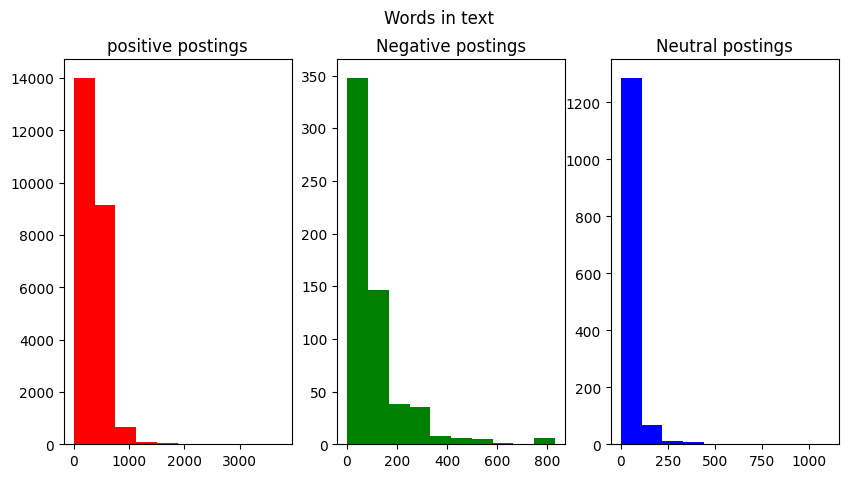

In [45]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
text_len=df[df['sentiment']==2]['transformed_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('positive postings')
text_len=df[df['sentiment']==0]['transformed_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Negative postings')
text_len=df[df['sentiment']==1]['transformed_text'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='blue')
ax3.set_title('Neutral postings')
fig.suptitle('Words in text')
plt.show()

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from wordcloud import WordCloud

In [49]:
wc = WordCloud(width=600,height=600,min_font_size=20,background_color='black')

In [51]:
positive_wc = wc.generate(df[df['sentiment']==2]['transformed_text'].str.cat(sep=" "))

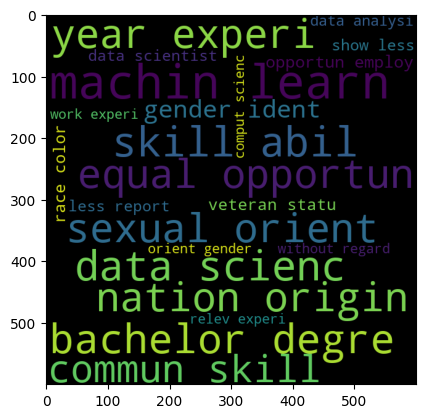

In [52]:
plt.imshow(positive_wc)

In [53]:
negative_wc = wc.generate(df[df['sentiment']==0]['transformed_text'].str.cat(sep=" "))

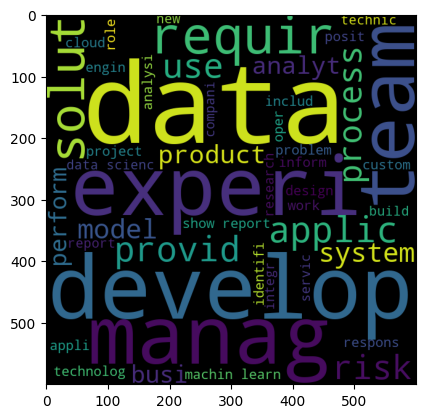

In [54]:
plt.imshow(negative_wc)

In [55]:
neutral_wc = wc.generate(df[df['sentiment']==1]['transformed_text'].str.cat(sep=" "))

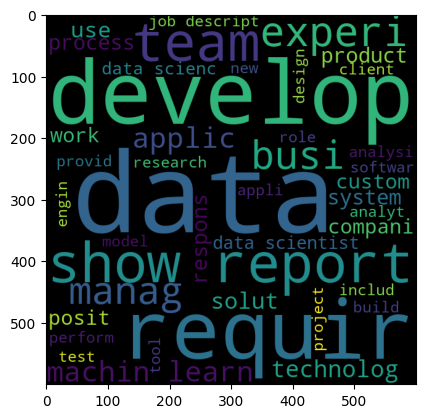

In [56]:
plt.imshow(neutral_wc)

In [57]:
# finding the top 30 words of negative and positive
from collections import Counter

In [58]:
positive_corpus=[]

for msg in df[df['sentiment']==2]['transformed_text'].tolist():
  for word in msg.split():
    positive_corpus.append(word)

len(positive_corpus)

7496482

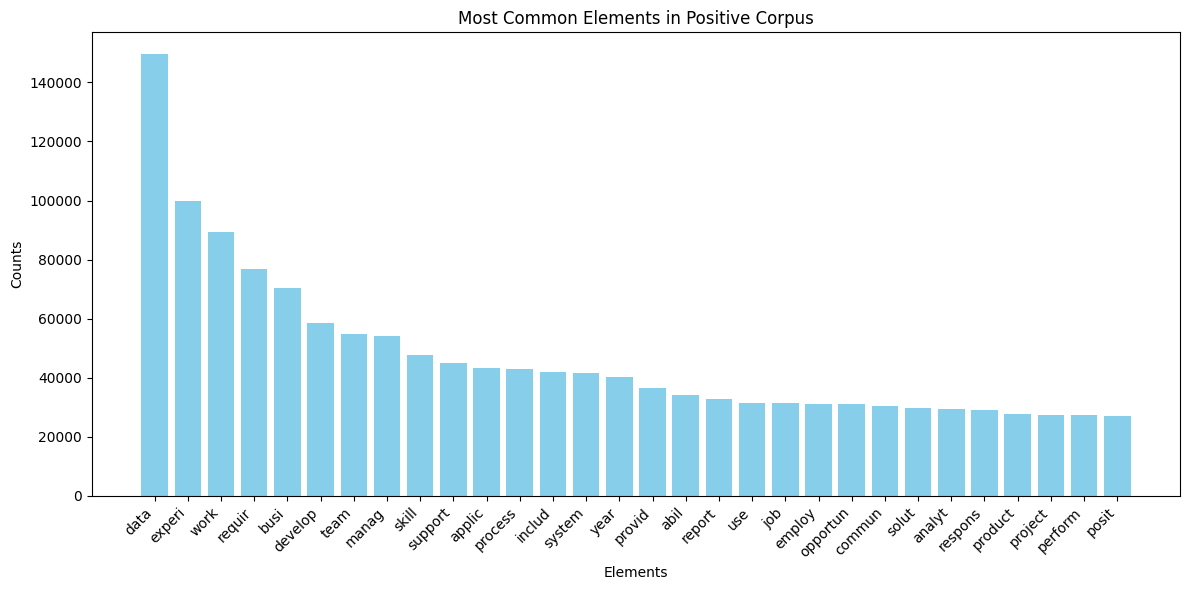

In [59]:
common_elements = Counter(positive_corpus).most_common(30)
elements, counts = zip(*common_elements)
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(elements, counts, color='skyblue')
plt.xlabel('Elements')
plt.ylabel('Counts')
plt.title('Most Common Elements in Positive Corpus')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [61]:
negative_corpus=[]
for msg in df[df['sentiment']==0]['transformed_text'].tolist():
  for word in msg.split():
    negative_corpus.append(word)

len(negative_corpus)

68518

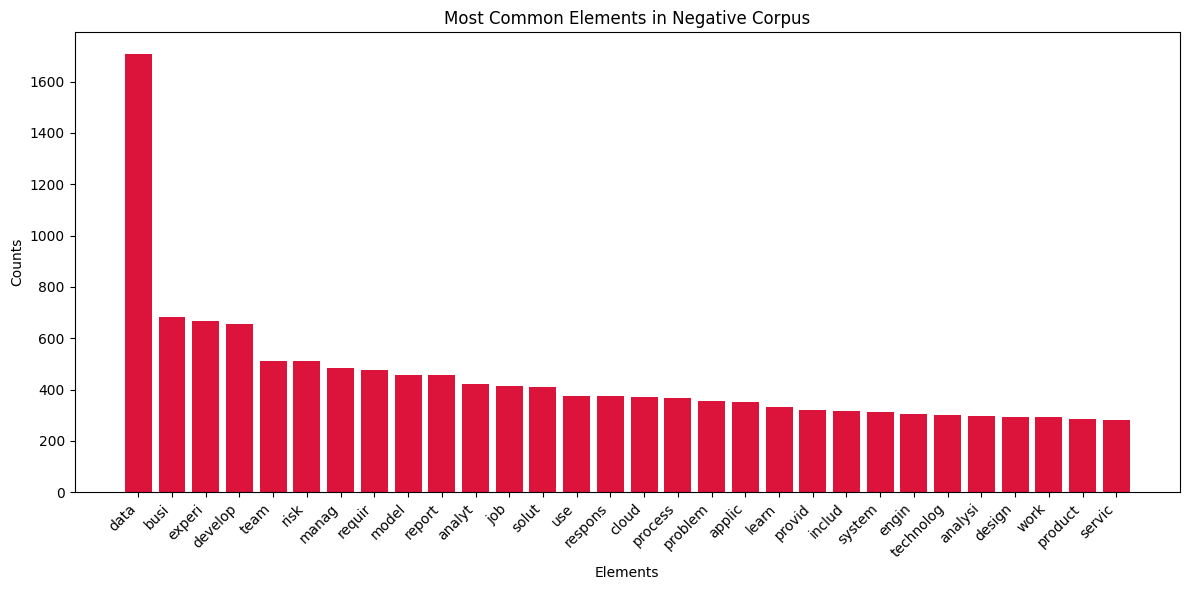

In [62]:
common_elements = Counter(negative_corpus).most_common(30)
elements, counts = zip(*common_elements)
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(elements, counts, color='crimson')
plt.xlabel('Elements')
plt.ylabel('Counts')
plt.title('Most Common Elements in Negative Corpus')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [63]:
neutral_corpus=[]
for msg in df[df['sentiment']==1]['transformed_text'].tolist():
  for word in msg.split():
    neutral_corpus.append(word)

len(neutral_corpus)

65878

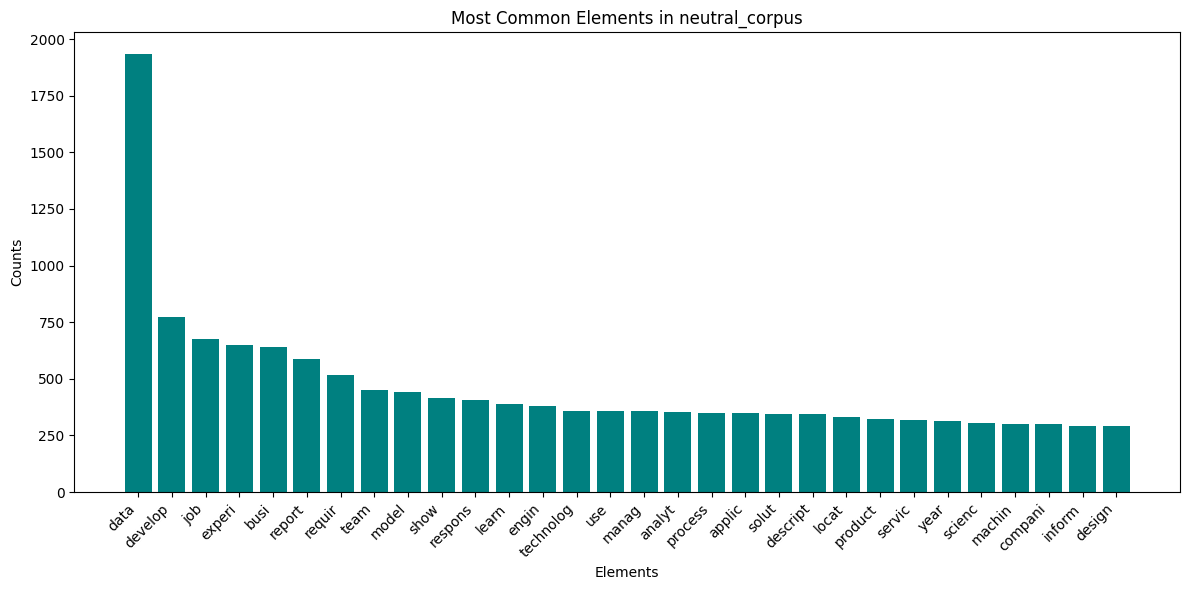

In [65]:
common_elements = Counter(neutral_corpus).most_common(30)
elements, counts = zip(*common_elements)
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(elements, counts, color='teal')
plt.xlabel('Elements')
plt.ylabel('Counts')
plt.title('Most Common Elements in neutral_corpus')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [67]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(25923, 66832)

In [70]:
Y = df['sentiment'].values

In [71]:
Y.shape

(25923,)

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
from scipy.sparse import csr_matrix

# Assuming X is a sparse matrix
X_sparse = csr_matrix(X)

# Perform train-test split on the sparse matrix
x_train, x_test, y_train, y_test = train_test_split(X_sparse, Y, random_state=2, test_size=.2)

In [75]:

x_train.shape

(20738, 66832)

In [76]:
x_test.shape

(5185, 66832)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(max_depth=3, subsample=0.8, colsample_bytree=0.8)

In [80]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [81]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y1 = clf.predict(x_test)
  accuracy=accuracy_score(y_test,y1)
  precision = precision_score(y_test,y1,average='weighted')

  return accuracy,precision

In [82]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

c:\Users\apoor\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for SVC
accuracy 0.8784956605593057
precision 0.8489424576694479
for KN
accuracy 0.8366441658630666
precision 0.9310862225465847
for NB
accuracy 0.925168756027001
precision 0.9030891654930272
for DT
accuracy 0.9147540983606557
precision 0.9267868472385972
for LR
accuracy 0.973191899710704
precision 0.9724024783741566
for RF
accuracy 0.9531340405014465
precision 0.9516784584603887
for AdaBoost
accuracy 0.9458052073288332
precision 0.9422422677886956
for BgC
accuracy 0.9618129218900675
precision 0.9581650572116529
for ETC
accuracy 0.9548698167791707
precision 0.9535933454240757
for GBDT
accuracy 0.9436837029893925
precision 0.938647492226574
for xgb
accuracy 0.962198649951784
precision 0.9597120651662495


In [83]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df


,Algorithm,Accuracy,Precision
4,LR,0.973192,0.972402
10,xgb,0.962199,0.959712
7,BgC,0.961813,0.958165
8,ETC,0.954870,0.953593
5,RF,0.953134,0.951678
6,AdaBoost,0.945805,0.942242
9,GBDT,0.943684,0.938647
1,KN,0.836644,0.931086
3,DT,0.914754,0.926787
2,NB,0.925169,0.903089
